# Setup

In [37]:
# Add parent directory to current path. Needed for research imports.
import os.path
import sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.insert(0,p)

# Enable hot reloading
%load_ext autoreload
%autoreload 2


import datetime
import itertools
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from experiments.irl.fair_irl import *
from research.irl.fair_irl import *
from research.ml.svm import SVM
from research.utils import *
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold


logging.basicConfig(level=logging.INFO)
warnings.filterwarnings('ignore')

cp = sns.color_palette()
sns.set_style('darkgrid')

from IPython.display import display, HTML
display(HTML("<style>.container { width:1800px !important; }</style>"))
pd.set_option('display.max_colwidth', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Set Parameters

In [95]:
##
# Objective set - the fairness metrics to consider.
##
obj_set = ObjectiveSet([
    AccuracyObjective(),
    DisparateImpactObjective(),
    EqualOpportunityObjective(),
])

##
# Dataset
##
DATASET = 'COMPAS'
N_DATASET_SAMPLES = 25_000

##
# Expert demonstration parameters
##
N_EXPERT_DEMOS = 3
EXPERT_ALGO = 'HardtEqOpp'


N_TRIALS = 10
##
# IRL loop parameters
##
IRL_METHOD = 'FairIRLFO'
N_INIT_POLICIES = 1
NO_NEG_WEIGHTS = False
SAMPLE_LEARNED_POLICIES = False
RANDOM_WEIGHT_RATE = 0
SKIP_ERROR_TERMS = True
METHOD = 'highs'
epsilon = .05
max_iter = 6

##
# Plotting parameters
##
ANNOTATE = True
NOISE_FACTOR = .02

In [96]:
trial_info = {
    'objective_names': [obj.name for obj in obj_set.objectives],
    'DATASET': DATASET,
    'N_EXPERT_DEMOS': N_EXPERT_DEMOS,
    'EXPERT_ALGO': EXPERT_ALGO,
    'N_TRIALS': N_TRIALS,
    'IRL_METHOD': IRL_METHOD,
    'N_INIT_POLICIES': N_INIT_POLICIES,
    'epsilon': epsilon,
    'max_iter': max_iter,
}

# Run trial

INFO:root:

TRIAL 0

INFO:root:muE:
[[0.63527397 0.79280822 0.98301698]
 [0.6380789  0.7890223  0.97853535]
 [0.60034305 0.78216123 0.97025067]]
INFO:root:muE_hold:
[[0.59794256 0.84204886 0.96518937]
 [0.60072868 0.80668667 0.97862353]
 [0.59399786 0.8357985  0.99627976]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.487
INFO:root:best weight:	 [ 0.445 -0.461  0.093]


,Acc,DispImp,EqOpp,is_expert,muL_hold_Acc,muL_hold_DispImp,muL_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DispImp_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.635274,0.792808,0.983017,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.00000,0.000000
1,0.638079,0.789022,0.978535,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.00000,0.000000
2,0.600343,0.782161,0.970251,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.00000,0.000000
3,0.506920,0.878893,0.950698,0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,inf,inf,0.00000,0.000000
4,1.000000,0.796571,1.000000,0,0.525255,0.333929,0.006972,0.0,1.0,0.445492,-0.461270,0.093238,0.243797,0.708788,0.37622,1.093779
5,1.000000,0.796571,1.000000,0,0.525184,0.334857,0.008451,0.0,2.0,-0.131835,-0.672149,0.196016,0.268038,0.778031,0.37622,1.092048
6,1.000000,0.796571,1.000000,0,0.525184,0.334857,0.008451,0.0,3.0,-0.131809,-0.672168,0.196023,0.268044,0.778048,0.37622,1.092048
7,1.000000,0.796571,1.000000,0,0.525255,0.333929,0.006972,0.0,4.0,-0.131794,-0.672179,0.196027,0.268047,0.779290,0.37622,1.093779
8,1.000000,0.796571,1.000000,0,0.525255,0.333929,0.006972,0.0,5.0,-0.131811,-0.672167,0.196022,0.268044,0.779280,0.37622,1.093779
9,1.000000,0.796571,1.000000,0,0.525184,0.334857,0.008451,0.0,6.0,-0.131903,-0.672099,0.195997,0.268024,0.777988,0.37622,1.092048


INFO:root:

TRIAL 1

INFO:root:muE:
[[0.57876712 0.9109589  0.95853806]
 [0.57118353 0.864494   0.92250197]
 [0.5626072  0.90222985 0.94846401]]
INFO:root:muE_hold:
[[0.60865838 0.82468924 0.99140047]
 [0.60651522 0.81483069 0.99563021]
 [0.60921758 0.82293676 0.99990179]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.459
INFO:root:best weight:	 [-0.144  0.151  0.705]


,Acc,DispImp,EqOpp,is_expert,muL_hold_Acc,muL_hold_DispImp,muL_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DispImp_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.578767,0.910959,0.958538,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
1,0.571184,0.864494,0.922502,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
2,0.562607,0.902230,0.948464,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
3,0.489619,0.873702,0.892347,0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
4,1.000000,0.801714,1.000000,0,0.563406,0.940844,0.872232,0.0,1.0,0.679768,-0.039021,0.281211,0.325848,0.131030,0.442324,0.177868
5,1.000000,0.801714,1.000000,0,0.406587,0.998214,0.689589,0.0,2.0,-0.131074,0.150715,0.718211,0.329738,0.303506,0.442324,0.407134
6,1.000000,0.801714,1.000000,0,0.406158,0.995928,0.683112,0.0,3.0,-0.131587,0.150715,0.717697,0.329559,0.306413,0.442324,0.411257
7,1.000000,0.801714,1.000000,0,0.406158,0.995928,0.683112,0.0,4.0,-0.128705,0.150713,0.720583,0.330567,0.307349,0.442324,0.411257
8,1.000000,0.801714,1.000000,0,0.406587,0.998214,0.689589,0.0,5.0,-0.131892,0.150716,0.717393,0.329453,0.303243,0.442324,0.407134
9,1.000000,0.801714,1.000000,0,0.406158,0.995928,0.683112,0.0,6.0,-0.144065,0.150728,0.705207,0.325278,0.302432,0.442324,0.411257


INFO:root:

TRIAL 2

INFO:root:muE:
[[0.58219178 0.92294521 0.85432653]
 [0.59005146 0.78044597 0.93131868]
 [0.59348199 0.79931389 0.85220294]]
INFO:root:muE_hold:
[[0.60972996 0.8176168  0.97398819]
 [0.60565795 0.82961852 0.96228385]
 [0.5903537  0.8340836  0.97819505]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.483
INFO:root:best weight:	 [0.52  0.04  0.439]


,Acc,DispImp,EqOpp,is_expert,muL_hold_Acc,muL_hold_DispImp,muL_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DispImp_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.582192,0.922945,0.854327,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
1,0.590051,0.780446,0.931319,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
2,0.593482,0.799314,0.852203,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
3,0.553633,0.880623,0.826469,0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
4,1.000000,0.790857,1.000000,0,0.564192,0.953847,0.905718,0.0,1.0,0.520453,0.040286,0.439261,0.294015,0.100758,0.430958,0.147689
5,1.000000,0.790857,1.000000,0,0.372723,0.949704,0.679844,0.0,2.0,-0.275689,-0.032768,0.691543,0.321146,0.291116,0.430958,0.390660
6,1.000000,0.790857,1.000000,0,0.373080,0.943059,0.690095,0.0,3.0,-0.275284,-0.032857,0.691859,0.321210,0.283809,0.430958,0.380779
7,1.000000,0.790857,1.000000,0,0.370865,0.950132,0.684123,0.0,4.0,-0.275705,-0.033862,0.690433,0.320726,0.289287,0.430958,0.388714
8,1.000000,0.790857,1.000000,0,0.370865,0.957277,0.665941,0.0,5.0,-0.274552,-0.040186,0.685262,0.318611,0.299112,0.430958,0.404583
9,1.000000,0.790857,1.000000,0,0.372866,0.939987,0.701976,0.0,6.0,-0.273231,-0.049070,0.677699,0.315613,0.271901,0.430958,0.371271


INFO:root:

TRIAL 3

INFO:root:muE:
[[0.59931507 0.82363014 0.96988156]
 [0.60891938 0.81818182 0.9769059 ]
 [0.60205832 0.80274443 0.9225    ]]
INFO:root:muE_hold:
[[0.57543935 0.84376339 0.93582316]
 [0.59258465 0.83926275 0.94534618]
 [0.61264737 0.82572347 0.99060308]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.488
INFO:root:best weight:	 [ 0.425 -0.38   0.195]


,Acc,DispImp,EqOpp,is_expert,muL_hold_Acc,muL_hold_DispImp,muL_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DispImp_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.599315,0.823630,0.969882,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
1,0.608919,0.818182,0.976906,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
2,0.602058,0.802744,0.922500,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
3,0.505190,0.889273,0.877964,0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
4,1.000000,0.786286,1.000000,0,0.546331,0.434236,0.430090,0.0,1.0,0.424985,-0.379625,0.195389,0.240952,0.400392,0.399977,0.664643
5,1.000000,0.786286,1.000000,0,0.436594,0.728156,0.721239,0.0,2.0,-0.179924,-0.576644,0.243432,0.260492,0.197568,0.399977,0.303359
6,1.000000,0.786286,1.000000,0,0.440094,0.696221,0.668984,0.0,3.0,-0.180016,-0.577852,0.242132,0.260737,0.231633,0.399977,0.355331
7,1.000000,0.786286,1.000000,0,0.436594,0.728156,0.721239,0.0,4.0,-0.180056,-0.576288,0.243656,0.260414,0.197509,0.399977,0.303359
8,1.000000,0.786286,1.000000,0,0.436594,0.728156,0.721239,0.0,5.0,-0.180238,-0.576127,0.243635,0.260374,0.197478,0.399977,0.303359
9,1.000000,0.786286,1.000000,0,0.440094,0.696221,0.668984,0.0,6.0,-0.179977,-0.576531,0.243492,0.260467,0.231394,0.399977,0.355331


INFO:root:

TRIAL 4

INFO:root:muE:
[[0.59417808 0.77568493 0.97282767]
 [0.56603774 0.79073756 0.96600242]
 [0.5728988  0.7941681  0.93062334]]
INFO:root:muE_hold:
[[0.60115731 0.83390484 0.98273802]
 [0.60201457 0.81118731 0.9966959 ]
 [0.61157556 0.81843516 0.98270841]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.482
INFO:root:best weight:	 [ 0.546 -0.386  0.068]


,Acc,DispImp,EqOpp,is_expert,muL_hold_Acc,muL_hold_DispImp,muL_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DispImp_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.594178,0.775685,0.972828,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.00000,0.000000
1,0.566038,0.790738,0.966002,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.00000,0.000000
2,0.572899,0.794168,0.930623,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.00000,0.000000
3,0.489619,0.852941,0.920646,0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,inf,inf,0.00000,0.000000
4,1.000000,0.761143,1.000000,0,0.525827,0.338715,0.007234,0.0,1.0,0.545798,-0.385862,0.068340,0.285767,0.735945,0.42531,1.095313
5,1.000000,0.761143,1.000000,0,0.525827,0.338715,0.007234,0.0,2.0,-0.131272,-0.792926,-0.075802,0.343346,0.884230,0.42531,1.095313
6,1.000000,0.761143,1.000000,0,0.525827,0.338715,0.007234,0.0,3.0,-0.130867,-0.793368,-0.075764,0.343502,0.884631,0.42531,1.095313
7,1.000000,0.761143,1.000000,0,0.525827,0.338715,0.007234,0.0,4.0,-0.130764,-0.793482,-0.075754,0.343541,0.884733,0.42531,1.095313
8,1.000000,0.761143,1.000000,0,0.525827,0.338715,0.007234,0.0,5.0,-0.130865,-0.793371,-0.075764,0.343503,0.884633,0.42531,1.095313
9,1.000000,0.761143,1.000000,0,0.525827,0.338715,0.007234,0.0,6.0,-0.131069,-0.793148,-0.075783,0.343424,0.884431,0.42531,1.095313


INFO:root:

TRIAL 5

INFO:root:muE:
[[0.59417808 0.78767123 0.9578871 ]
 [0.58662093 0.80960549 0.89177838]
 [0.58833619 0.83533448 0.92020202]]
INFO:root:muE_hold:
[[0.58551222 0.86326618 0.9401238 ]
 [0.58958423 0.82404629 0.97148453]
 [0.59935691 0.82422294 0.98260361]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.497
INFO:root:best weight:	 [ 0.005  0.501 -0.494]


,Acc,DispImp,EqOpp,is_expert,muL_hold_Acc,muL_hold_DispImp,muL_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DispImp_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.594178,0.787671,0.957887,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
1,0.586621,0.809605,0.891778,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
2,0.588336,0.835334,0.920202,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
3,0.508651,0.771626,0.961212,0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
4,1.000000,0.805143,1.000000,0,0.620133,0.686647,0.745850,0.0,1.0,0.804764,0.154349,-0.040886,0.342487,0.219219,0.417437,0.267193
5,1.000000,0.805143,1.000000,0,0.532757,0.776738,0.737763,0.0,2.0,0.004311,0.501453,-0.494236,0.293913,0.170470,0.417437,0.242114
6,1.000000,0.805143,1.000000,0,0.538544,0.777238,0.759985,0.0,3.0,0.004435,0.501400,-0.494165,0.293877,0.154751,0.417437,0.219816
7,1.000000,0.805143,1.000000,0,0.533114,0.767236,0.723123,0.0,4.0,0.005421,0.500976,-0.493603,0.293589,0.181608,0.417437,0.258218
8,1.000000,0.805143,1.000000,0,0.536972,0.788669,0.794834,0.0,5.0,0.004867,0.501215,-0.493919,0.293751,0.130122,0.417437,0.184911
9,1.000000,0.805143,1.000000,0,0.538901,0.767736,0.745345,0.0,6.0,0.004806,0.501241,-0.493954,0.293769,0.166120,0.417437,0.236051


INFO:root:

TRIAL 6

INFO:root:muE:
[[0.59417808 0.79794521 0.91000903]
 [0.57975986 0.82847341 0.91453046]
 [0.60377358 0.84734134 0.9110328 ]]
INFO:root:muE_hold:
[[0.59301329 0.84012002 0.95988875]
 [0.60158594 0.82297471 0.98336742]
 [0.57834941 0.85123258 0.9558052 ]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.499
INFO:root:best weight:	 [ 0.361 -0.071 -0.567]


,Acc,DispImp,EqOpp,is_expert,muL_hold_Acc,muL_hold_DispImp,muL_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DispImp_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.594178,0.797945,0.910009,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
1,0.579760,0.828473,0.914530,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
2,0.603774,0.847341,0.911033,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
3,0.534602,0.837370,0.985410,0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
4,1.000000,0.785143,1.000000,0,0.602272,0.576195,0.251060,0.0,1.0,0.361454,-0.071212,-0.567334,0.283242,0.515336,0.418717,0.761821
5,1.000000,0.785143,1.000000,0,0.524184,0.335072,0.009118,0.0,2.0,0.023201,-0.051644,-0.925155,0.388103,1.004211,0.418717,1.083425
6,1.000000,0.785143,1.000000,0,0.524184,0.335072,0.009118,0.0,3.0,0.023207,-0.051644,-0.925149,0.388100,1.004205,0.418717,1.083425
7,1.000000,0.785143,1.000000,0,0.523469,0.338501,0.015267,0.0,4.0,0.023223,-0.051645,-0.925131,0.388093,0.997716,0.418717,1.076444
8,1.000000,0.785143,1.000000,0,0.524184,0.335072,0.009118,0.0,5.0,0.023211,-0.051645,-0.925144,0.388098,1.004200,0.418717,1.083425
9,1.000000,0.785143,1.000000,0,0.523469,0.338501,0.015267,0.0,6.0,0.023217,-0.051645,-0.925138,0.388096,0.997723,0.418717,1.076444


INFO:root:

TRIAL 7

INFO:root:muE:
[[0.60445205 0.82363014 0.97909824]
 [0.61921098 0.85763293 0.95106573]
 [0.56432247 0.85763293 0.91983122]]
INFO:root:muE_hold:
[[0.58251179 0.80368624 0.99022502]
 [0.58679811 0.86433776 0.94125047]
 [0.58156484 0.88981779 0.98120383]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.487
INFO:root:best weight:	 [ 0.532  0.254 -0.214]


,Acc,DispImp,EqOpp,is_expert,muL_hold_Acc,muL_hold_DispImp,muL_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DispImp_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.604452,0.823630,0.979098,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
1,0.619211,0.857633,0.951066,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
2,0.564322,0.857633,0.919831,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
3,0.482699,0.809689,0.965463,0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
4,1.000000,0.800000,1.000000,0,0.555476,0.934486,0.727088,0.0,1.0,0.531730,0.253910,-0.214360,0.256898,0.162224,0.409712,0.258721
5,1.000000,0.800000,1.000000,0,0.454383,0.942416,0.394672,0.0,2.0,-0.003033,0.744463,0.252504,0.322085,0.469573,0.409712,0.597326
6,1.000000,0.800000,1.000000,0,0.454383,0.942416,0.394672,0.0,3.0,-0.002366,0.744924,0.252710,0.322290,0.469872,0.409712,0.597326
7,1.000000,0.800000,1.000000,0,0.454383,0.942416,0.394672,0.0,4.0,-0.002390,0.744907,0.252702,0.322282,0.469861,0.409712,0.597326
8,1.000000,0.800000,1.000000,0,0.454383,0.942416,0.394672,0.0,5.0,-0.003153,0.744380,0.252467,0.322048,0.469519,0.409712,0.597326
9,1.000000,0.800000,1.000000,0,0.454383,0.942416,0.394672,0.0,6.0,-0.002847,0.744592,0.252562,0.322142,0.469656,0.409712,0.597326


INFO:root:

TRIAL 8

INFO:root:muE:
[[0.59589041 0.82191781 0.92913912]
 [0.57461407 0.82847341 0.96818182]
 [0.58833619 0.89365352 0.95486111]]
INFO:root:muE_hold:
[[0.6075868  0.81461637 0.99141999]
 [0.59687098 0.83026147 0.9726983 ]
 [0.60535906 0.84501608 0.97029615]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.479
INFO:root:best weight:	 [-0.151 -0.244  0.605]


,Acc,DispImp,EqOpp,is_expert,muL_hold_Acc,muL_hold_DispImp,muL_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DispImp_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.595890,0.821918,0.929139,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
1,0.574614,0.828473,0.968182,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
2,0.588336,0.893654,0.954861,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
3,0.484429,0.849481,0.898692,0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
4,1.000000,0.782857,1.000000,0,0.573980,0.909266,0.955849,0.0,1.0,0.603483,-0.057861,0.338656,0.292845,0.060712,0.421708,0.087428
5,1.000000,0.782857,1.000000,0,0.452311,0.652140,0.586010,0.0,2.0,-0.154237,-0.189606,0.656157,0.295280,0.319475,0.421708,0.456262
6,1.000000,0.782857,1.000000,0,0.452311,0.652140,0.586010,0.0,3.0,-0.150852,-0.244461,0.604687,0.282312,0.305445,0.421708,0.456262
7,1.000000,0.782857,1.000000,0,0.452311,0.652140,0.586010,0.0,4.0,-0.151745,-0.225555,0.622700,0.286531,0.310009,0.421708,0.456262
8,1.000000,0.782857,1.000000,0,0.452311,0.652140,0.586010,0.0,5.0,-0.155249,-0.192683,0.652068,0.294115,0.318215,0.421708,0.456262
9,1.000000,0.782857,1.000000,0,0.452311,0.652140,0.586010,0.0,6.0,-0.150917,-0.235197,0.613886,0.284442,0.307749,0.421708,0.456262


INFO:root:

TRIAL 9

INFO:root:muE:
[[0.56164384 0.86815068 0.91338259]
 [0.58319039 0.81989708 0.88020942]
 [0.55231561 0.85763293 0.96855693]]
INFO:root:muE_hold:
[[0.62173168 0.82083155 0.96200827]
 [0.60522932 0.81504501 0.97209669]
 [0.59978564 0.82700965 0.9896276 ]]
INFO:root:	IRL Loop iteration 1/6 ...
INFO:root:	IRL Loop iteration 2/6 ...
INFO:root:	IRL Loop iteration 3/6 ...
INFO:root:	IRL Loop iteration 4/6 ...
INFO:root:	IRL Loop iteration 5/6 ...
INFO:root:	IRL Loop iteration 6/6 ...
INFO:root:Best Learned Policy yhat: 0.484
INFO:root:best weight:	 [0.63  0.262 0.108]


,Acc,DispImp,EqOpp,is_expert,muL_hold_Acc,muL_hold_DispImp,muL_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DispImp_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.561644,0.868151,0.913383,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
1,0.583190,0.819897,0.880209,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
2,0.552316,0.857633,0.968557,1,0.000000,0.000000,0.000000,0.0,-1.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
3,0.456747,0.806228,0.930593,0,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,inf,inf,0.000000,0.000000
4,1.000000,0.798286,1.000000,0,0.583768,0.938272,0.831656,0.0,1.0,0.629860,0.262037,0.108103,0.306890,0.128888,0.444315,0.186603
5,1.000000,0.798286,1.000000,0,0.560834,0.952633,0.706763,0.0,2.0,0.044982,0.680372,-0.274646,0.326612,0.222204,0.444315,0.302281
6,1.000000,0.798286,1.000000,0,0.561763,0.944560,0.720094,0.0,3.0,0.045231,0.679354,-0.275415,0.326328,0.210651,0.444315,0.286813
7,1.000000,0.798286,1.000000,0,0.560834,0.952633,0.706763,0.0,4.0,0.044983,0.680225,-0.274792,0.326576,0.222179,0.444315,0.302281
8,1.000000,0.798286,1.000000,0,0.560834,0.952633,0.706763,0.0,5.0,0.044630,0.681151,-0.274219,0.326852,0.222367,0.444315,0.302281
9,1.000000,0.798286,1.000000,0,0.560834,0.952633,0.706763,0.0,6.0,0.045052,0.680170,-0.274778,0.326553,0.222164,0.444315,0.302281


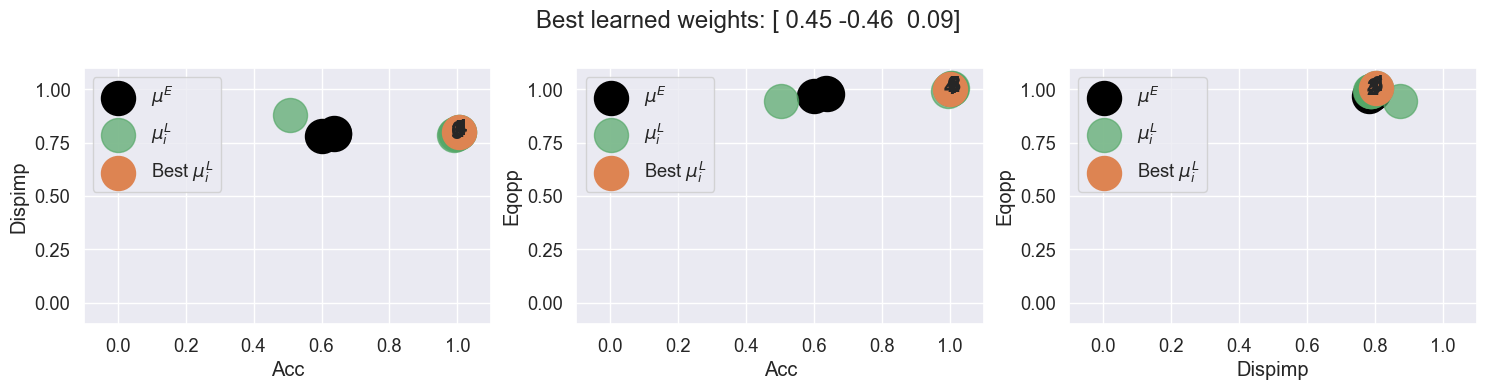

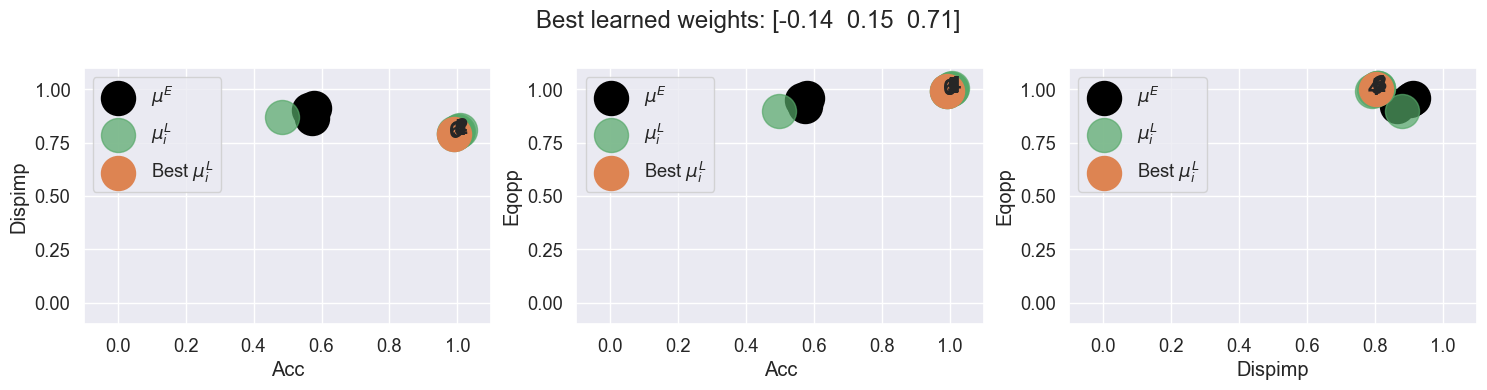

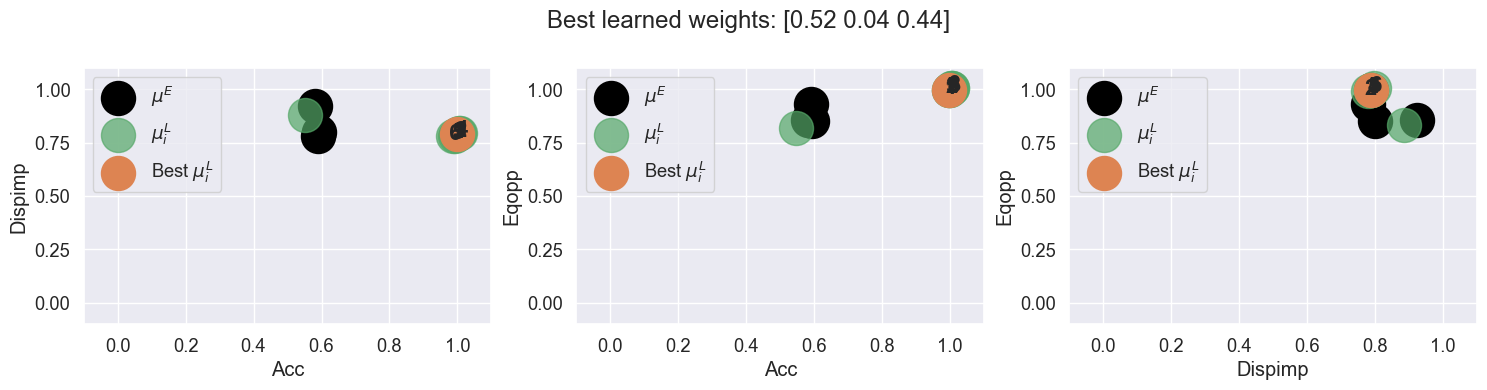

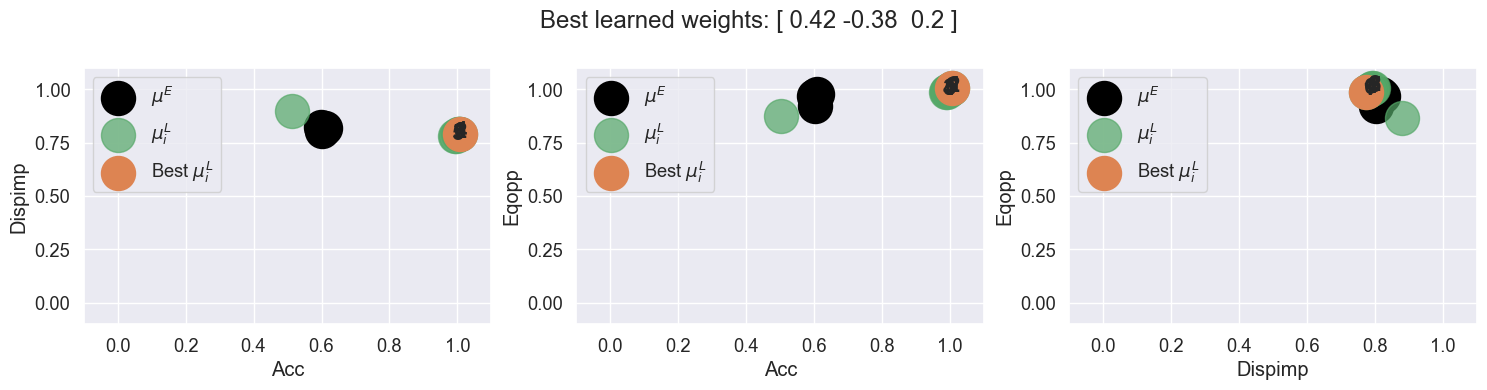

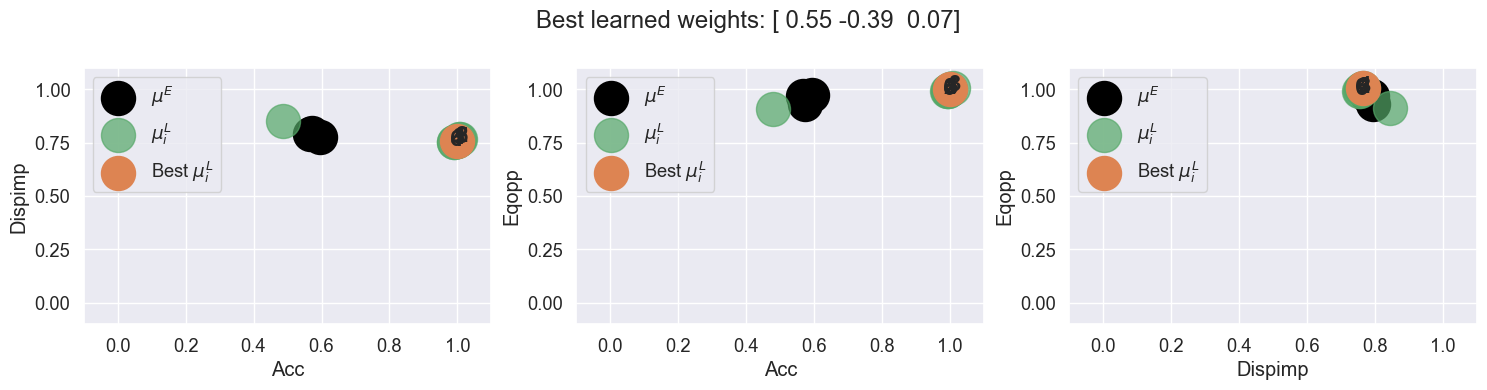

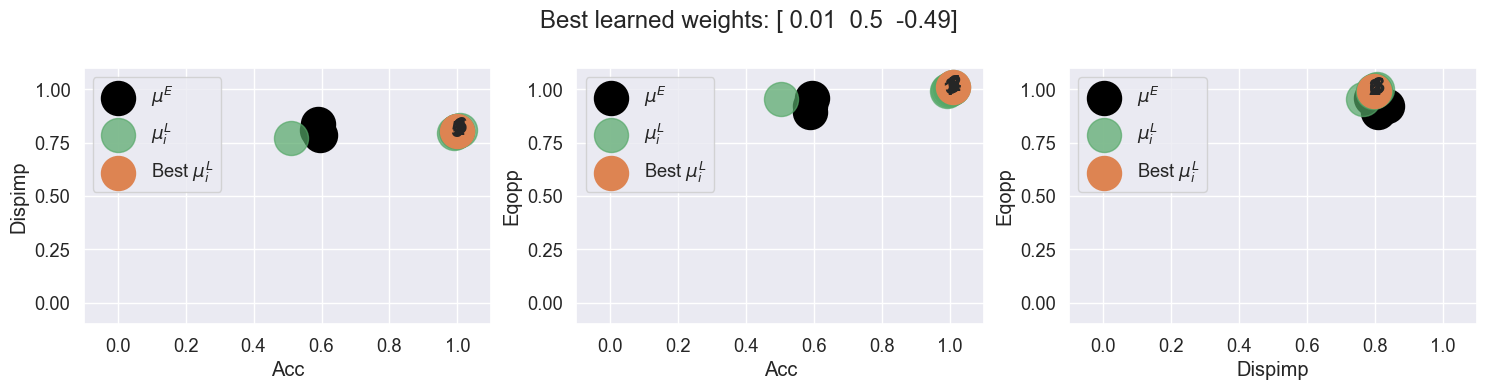

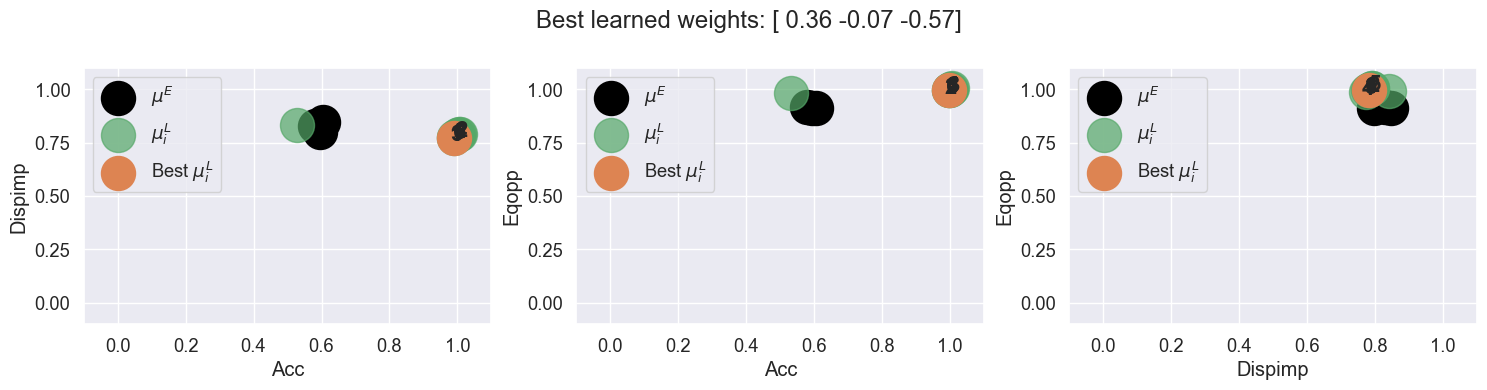

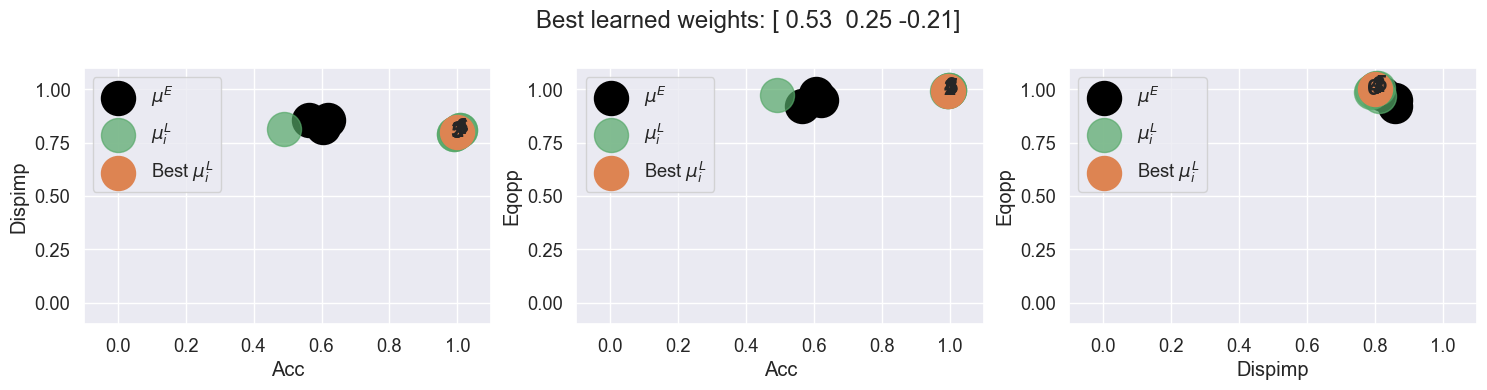

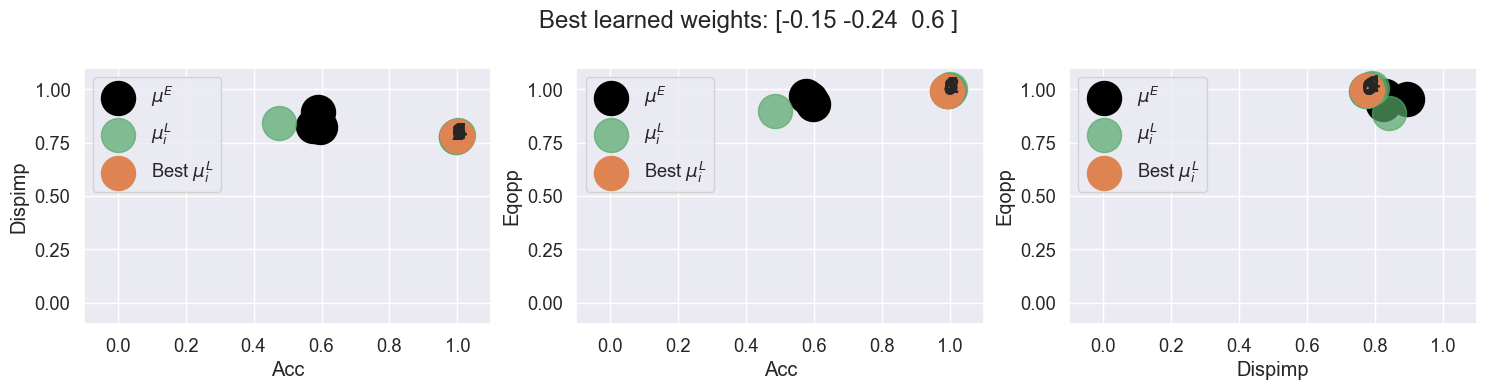

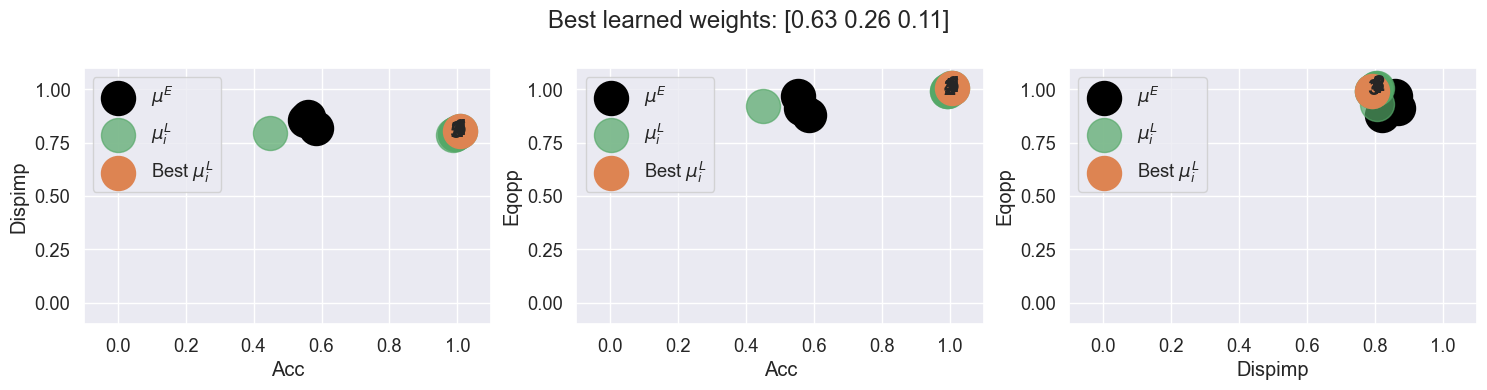

In [97]:
##
# Run the experiment trials
##
results = []
trial_i = 0
while trial_i < N_TRIALS:
    
    if IRL_METHOD == 'FairIRL':
        CAN_OBSERVE_Y = False
    elif IRL_METHOD == 'FairIRLFO':
        CAN_OBSERVE_Y = True
    
    logging.info(f"\n\nTRIAL {trial_i}\n")
    ##
    # Reset the objective set since they get fitted in each trial run
    ##
    obj_set.reset()

    ##
    # Read in dataset
    ##
    X, y, feature_types = generate_dataset(DATASET, n_samples=N_DATASET_SAMPLES)
    
    expert_demo_feature_types = feature_types
    irl_loop_feature_types = feature_types
    
    # These are the feature types that will be used in the classifier that will
    # predict `y` given `X` when learning the optimal policy for a given reward
    # function.
    pipe = sklearn_clf_pipeline(
        feature_types=expert_demo_feature_types,
    #     clf_inst=RandomForestClassifier(),  # For some resaon, using a RF here prevents the ThresholdOptimizer from obtaining a decent value on Demographic Parity
        clf_inst=DecisionTreeClassifier(min_samples_leaf=10, max_depth=4),
    )
    dem_par_clf = ThresholdOptimizer(
        estimator=pipe,
        constraints='demographic_parity',
        predict_method="predict",
        prefit=False,
    )
    dem_par_reduction = ReductionWrapper(
        clf=dem_par_clf,
        sensitive_features='z',
    )
    pipe = sklearn_clf_pipeline(
        feature_types=expert_demo_feature_types,
    #     clf_inst=RandomForestClassifier(),  # For some resaon, using a RF here prevents the ThresholdOptimizer from obtaining a decent value on Demographic Parity
        clf_inst=DecisionTreeClassifier(min_samples_leaf=10, max_depth=4),
    )
    eq_opp_clf = ThresholdOptimizer(
        estimator=pipe,
        constraints='true_positive_rate_parity',
        predict_method="predict",
        prefit=False,
    )
    eq_opp_reduction = ReductionWrapper(
        clf=eq_opp_clf,
        sensitive_features='z',
    )
    
    EXPERT_ALGO_LOOKUP = {
        'OptAcc': sklearn_clf_pipeline(expert_demo_feature_types, RandomForestClassifier()),
        # 'pos_pred_to_female_only': ManualClassifier(lambda row: int(row['sex'] == 'Female')),
        'HardtDisImp': dem_par_reduction,
        'HardtEqOpp': eq_opp_reduction,
    }

    ##
    # Split data into 3 sets.
    #     1. Demo - Produces expert demonstratinos
    #         1A. Train – Used for predicting Y from Z,X
    #         1B. Test – used for comparing muL with muE
    #     2. Hold – computes the unbiased values for muL and t (dataset is
    #.       never shown to the IRL learning algo.)
    ##
    X_demo, X_hold, y_demo, y_hold = train_test_split(X, y, test_size=.8)
    X_train, X_test, y_train, y_test = train_test_split(X_demo, y_demo, test_size=.5)
    del X_demo, y_demo # Make sure I don't acidentally use these variables later on

    ##
    # Generate expert demonstrations to learn from
    ##
    muE, demosE = generate_demos_k_folds(
        X=X_test,
        y=y_test,
        clf=EXPERT_ALGO_LOOKUP[EXPERT_ALGO],
        obj_set=obj_set,
        n_demos=N_EXPERT_DEMOS,
    )
    logging.info(f"muE:\n{muE}")
    
    ##
    # Generate expert demonstrations to learn for computing learned
    # performance. These expert demos are never shown to the IRL algo and are
    # only used for performance measurement.
    ##
    muE_hold, demosE_hold = generate_demos_k_folds(
        X=X_hold,
        y=y_hold,
        clf=EXPERT_ALGO_LOOKUP[EXPERT_ALGO],
        obj_set=obj_set,
        n_demos=N_EXPERT_DEMOS,
    )
    logging.info(f"muE_hold:\n{muE_hold}")

    ##
    # Run IRL loop.
    # Create a clf dataset where inputs are feature expectations and outputs are
    # whether the policy is expert or learned through IRL iterations. Then train
    # an SVM classifier on this dataset. Then extract the weights of the svm and
    # use them as the weights for the "reward" function. Then use this reward
    # function to learn a policy (classifier). Then compute the feature
    # expectations from this classifer on the irl hold-out set. Then compute the
    # error between the feature expectations of this learned clf and the
    # demonstration feature exp. If this error is less than epsilon, stop. The
    # reward function is the final set of weights.
    ##

    x_cols = (
        irl_loop_feature_types['boolean']
        + irl_loop_feature_types['categoric']
        + irl_loop_feature_types['continuous']
    )
    x_cols.remove('z')
    obj_set_cols = [obj.name for obj in obj_set.objectives]


    # Generate initial learned policies
    mu, _demos = generate_demos_k_folds(
        X=X_train,
        y=y_train,
        clf=DummyClassifier(strategy="uniform"),
        obj_set=obj_set,
        n_demos=N_INIT_POLICIES,
    )

    X_irl_exp = pd.DataFrame(muE, columns=obj_set_cols)
    y_irl_exp = pd.Series(np.ones(N_EXPERT_DEMOS), dtype=int)
    X_irl_learn = pd.DataFrame(mu, columns=obj_set_cols)
    y_irl_learn = pd.Series(np.zeros(len(mu)), dtype=int)

    t = []  # Errors for each iteration
    t_hold = []  # Errors on hold out set for each iteration
    mu_delta_l2norm_hist = []
    mu_delta_l2norm_hold_hist = []
    weights = []
    i = 0
    demo_history = []
    demo_hold_history = []
    mu_history = []
    mu_hold_history = []

    logging.debug('')
    logging.debug('Starting IRL Loop ...')

    while True:
        logging.info(f"\tIRL Loop iteration {i+1}/{max_iter} ...")

        # Train SVM classifier that distinguishes which demonstrations are expert
        # and which were generated from this loop.
        logging.debug('\tFitting SVM classifier...')
        X_irl = pd.concat([X_irl_exp, X_irl_learn], axis=0).reset_index(drop=True)
        y_irl = pd.concat([y_irl_exp, y_irl_learn], axis=0).reset_index(drop=True)
        svm = SVM().fit(X_irl, y_irl)
        wi = svm.weights()
        weights.append(wi)

        ##
        # Learn a policy (clf_pol) from the reward (SVM) weights.
        ##

        # Fit a classifier that predicts `y` from `X`.
        logging.debug('\tFitting `y|x` predictor for clf policy...')
        clf = sklearn_clf_pipeline(
            feature_types=irl_loop_feature_types,
            clf_inst=RandomForestClassifier(),
        )
        clf.fit(X_train, y_train)
        
        # Learn a policy that maximizes the reward function.
        logging.debug('\tComputing the optimal policy given reward weights and `y|x` classifier...')
        reward_weights = { obj.name: wi[j] for j, obj in enumerate(obj_set.objectives) }
        test_df = pd.DataFrame(X_test)
        test_df['y'] = y_test
        clf_pol = compute_optimal_policy(
            clf_df=test_df,  # NOT the dataset used to train the C_{Y_Z,X} clf
            clf=clf,
            x_cols=x_cols,
            obj_set=obj_set,
            reward_weights=reward_weights,
            skip_error_terms=SKIP_ERROR_TERMS,
            method=METHOD,
        )

        # Compute feature expectations of the learned policy
        logging.debug('\tGenerating learned demostration...')
        demo = generate_demo(clf_pol, X_test, y_test, can_observe_y=CAN_OBSERVE_Y)
        demo_hold = generate_demo(clf_pol, X_hold, y_hold, can_observe_y=False)
        demo_history.append(demo)
        demo_hold_history.append(demo_hold)
        muj = obj_set.compute_demo_feature_exp(demo)
        muj_hold = obj_set.compute_demo_feature_exp(demo_hold)
        mu_history.append(muj)
        mu_hold_history.append(muj_hold)
        logging.debug(f"\t\t muL[i] = {np.round(muj, 3)}")
        logging.debug(f"\t\t muL_hold[i] = {np.round(muj_hold, 3)}")

        # Append policy's feature expectations to irl clf dataset
        X_irl_learn_i = pd.DataFrame(np.array([muj]), columns=obj_set_cols)
        y_irl_learn_i = pd.Series(np.zeros(1), dtype=int)
        X_irl_learn = pd.concat([X_irl_learn, X_irl_learn_i], axis=0)
        y_irl_learn = pd.concat([y_irl_learn, y_irl_learn_i], axis=0)

        # Compute error of the learned policy: t[i] = wT(muE-mu[j])
        ti, mu_delta, mu_delta_l2norm= irl_error(wi, muE, muj)
        ti_hold, mu_delta_hold, mu_delta_l2norm_hold= irl_error(wi, muE_hold, muj_hold)
        t.append(ti)
        t_hold.append(ti_hold)
        mu_delta_l2norm_hist.append(mu_delta_l2norm)
        mu_delta_l2norm_hold_hist.append(mu_delta_l2norm_hold)
        logging.debug(f"\t\t mu_delta[i] \t= {np.round(mu_delta, 3)}")
        logging.debug(f"\t\t mu_delta_hold[i] \t= {np.round(mu_delta_hold, 3)}")
        logging.debug(f"\t\t t[i] \t\t= {t[i]:.5f}")
        logging.debug(f"\t\t t_hold[i] \t\t= {t_hold[i]:.5f}")
        logging.debug(f"\t\t weights[{i}] \t= {np.round(weights[i], 3)}")

        ## Show a summary of the learned policy
        # logging.info(
        #     df_to_log(
        #         demo.groupby(['z']+x_cols+['y', 'yhat'])[['age']].agg(['count']),
        #         title='\tLearned Policy:',
        #         tab_level=3,
        #     )
        # )

        if ti < epsilon or i >= max_iter - 1:
            break

        i += 1
        
        # End IRL Loop

    ##
    # Book keeping
    ##
 
    # Compare the best learned policy with the expert demonstrations
    best_iter = np.argmin(t)
    best_demo = demo_history[best_iter]
    best_weight = weights[best_iter]
    logging.debug('Best iteration: ' + str(best_iter))
    logging.info(f"Best Learned Policy yhat: {best_demo['yhat'].mean():.3f}")
    logging.info(f"best weight:\t {np.round(best_weight, 3)}")

    # Generate a dataframe for results gathering.
    X_irl = pd.concat([X_irl_exp, X_irl_learn], axis=0).reset_index(drop=True)
    y_irl = pd.concat([y_irl_exp, y_irl_learn], axis=0).reset_index(drop=True)
    df_irl = X_irl.copy()
    df_irl['is_expert'] = y_irl.copy()
    for i, col in enumerate(obj_set_cols):
        df_irl[f"muL_hold_{col}"] = np.zeros(N_EXPERT_DEMOS+N_INIT_POLICIES).tolist() + np.array(mu_hold_history)[:, i].tolist()
    df_irl['is_init_policy'] = np.zeros(N_EXPERT_DEMOS).tolist() + np.ones(N_INIT_POLICIES).tolist() + np.zeros(len(t)).tolist()
    df_irl['learn_idx'] = list(-1*np.ones(N_EXPERT_DEMOS)) + list(np.arange(N_INIT_POLICIES + len(t)))
    for i, col in enumerate(obj_set_cols):
        df_irl[f"{col}_weight"] = np.zeros(N_EXPERT_DEMOS+N_INIT_POLICIES).tolist() + [w[i] for w in weights]
    df_irl['t'] = list(np.inf*(np.ones(N_EXPERT_DEMOS+N_INIT_POLICIES))) + t
    df_irl['t_hold'] = list(np.inf*(np.ones(N_EXPERT_DEMOS+N_INIT_POLICIES))) + t_hold
    df_irl['mu_delta_l2norm'] = np.zeros(N_EXPERT_DEMOS+N_INIT_POLICIES).tolist() + mu_delta_l2norm_hist
    df_irl['mu_delta_l2norm_hold'] = np.zeros(N_EXPERT_DEMOS+N_INIT_POLICIES).tolist() + mu_delta_l2norm_hold_hist
    logging.debug('Experiment Summary')
    display(df_irl)

    ##
    # Plot results
    ##
    sns.set_theme(style='darkgrid', font_scale=1.2)
    feat_exp_combs = list(itertools.combinations(obj_set_cols, 2))
    exp = df_irl.query('is_expert == True').reset_index(drop=True)
    lrn = df_irl.query('is_expert == False').reset_index(drop=True)
    best_t_idx = lrn.query('t > 0')['t'].argmin()
    fig, axes = plt.subplots(1, len(feat_exp_combs), figsize=(5*len(feat_exp_combs), 4))
    axes = (axes,) if len(feat_exp_combs) == 1 else axes
    for i, (feat_exp_x, feat_exp_y) in enumerate(feat_exp_combs):
        # Plot expert
        axes[i].scatter(exp[feat_exp_x], exp[feat_exp_y], label='$\mu^E$', s=600, alpha=1, c='black')
        # Inject noise so we can see the expert when it's overlapping
        noise = NOISE_FACTOR*(np.random.rand(len(lrn))-.6)
        # Plot the learned policies
        axes[i].scatter(lrn[feat_exp_x]+noise, lrn[feat_exp_y]+noise, label='$\mu^L_i$', s=600, alpha=.7, c=cp[2])
        axes[i].set_ylim([-.1, 1.1])
        axes[i].set_xlim([-.1, 1.1])
        axes[i].set_xlabel(feat_exp_x.replace('_', ' ').title())
        axes[i].set_ylabel(feat_exp_y.replace('_', ' ').title())
        if ANNOTATE:
            # Label each learned policy with its ordered index
            for idx, row in lrn.iterrows():
                if row['is_init_policy']:
                    annotation = None
                else:
                    annotation = idx
                axes[i].annotate(annotation, (-.012+(row[feat_exp_x]+noise[idx]), -.015+(row[feat_exp_y]+noise[idx])), fontsize=16, fontweight=700)
        # Color the best policy
        axes[i].scatter([lrn.loc[best_t_idx][feat_exp_x]+noise[best_t_idx]], [lrn.loc[best_t_idx][feat_exp_y]+noise[best_t_idx]], label='Best $\mu^L_i$', s=600, alpha=1, c=cp[1])
        axes[i].legend(ncol=1, labelspacing=.7, loc='upper left')

    plt.suptitle(f"Best learned weights: {best_weight.round(2)}")
    plt.tight_layout()

    ##
    # Aggregate trial results
    ##
    results.append(new_trial_result(obj_set, muE, muE_hold, df_irl))
    
    trial_i += 1
    
    # End Trial
    
##
# Persist trial results
##
exp_df = generate_single_exp_results_df(obj_set, results)
timestamp = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
exp_df.to_csv(f"./../../data/experiment_output/fair_irl/trial_results/{timestamp}.csv", index=None)

##
# Persist trial info
##
import json
trial_info['timestamp'] = timestamp
fp = f"./../../data/experiment_output/fair_irl/trial_info/{timestamp}.json"
json.dump(trial_info, open(fp, 'w'))

# Compare Results

In [105]:
def compare_results(
    expert_algo, dataset, mu_noise_factor=0, w_noise_factor=0,
    mu_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    w_hue_order=[None, 'wL (FairIRL)', 'wL (FairIRLFO)'],
):
    # Construct a pivot table so we can do a seaborn boxplot
    mu_cols = ['Value', 'Demo Producer', 'Feature Expectation']
    mu_rows = []
    w_cols = ['Value', 'IRL Method', 'Weight']
    w_rows = []

    path_prefix = './../../data/experiment_output/fair_irl/'
    trial_results_files = sorted(os.listdir(f"{path_prefix}/trial_results/"))
    trial_info_files = sorted(os.listdir(f"{path_prefix}/trial_info/"))

    # For each experiment...
    for (result_file, info_file) in zip(trial_results_files, trial_info_files):
        if result_file.replace('csv', '') != info_file.replace('json', ''):
            raise ValueError(
                f"Mismatched number of results and info files. "
                f"{result_file}, {info_file}"
            )
        result = pd.read_csv(f"{path_prefix}/trial_results/{result_file}", index_col=None)
        info = json.load(open(f"{path_prefix}/trial_info/{info_file}"))

        # Filter to only experiments for the input `expert_algo`
        if info['EXPERT_ALGO'] != expert_algo or info['DATASET'] != dataset:
            continue
            
        for idx, row in result.iterrows():
            # Append muE and muL results
            for obj_name in info['objective_names']:
                mu_rows.append([row[f"muE_hold_{obj_name}_mean"], 'muE', obj_name])
            for obj_name in info['objective_names']:
                mu_rows.append([row[f"muL_hold_{obj_name}"], f"muL ({info['IRL_METHOD']})", obj_name])
                w_rows.append([row[f"wL_{obj_name}"], f"wL ({info['IRL_METHOD']})", obj_name])

    if len(mu_rows) == 0:
        raise ValueError(f"No experimets with EXPERT_ALGO={expert_algo}")

    mu_df = pd.DataFrame(mu_rows, columns=mu_cols)
    mu_df['Value'] += mu_noise_factor*(np.random.rand(len(mu_df)) - .5)
    w_df = pd.DataFrame(w_rows, columns=w_cols)
    w_df['Value'] += w_noise_factor*(np.random.rand(len(w_df)) - .5)

    # Plot boxplot for feature expectations
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 11))
    sns.boxplot(
        x=mu_df['Feature Expectation'],
        y=mu_df['Value'],
        hue=mu_df['Demo Producer'],
        hue_order=mu_hue_order,
        ax=ax1,
        fliersize=0,  # Remove outliers
        saturation=1,
    )
    ax1.set_ylabel(None)
    ax1.set_xlabel('Learned Feature Expectations')
    ax1.legend(title=None)
    ax1.set_ylim([.3,1.1])

    # Plot boxplot for weights
    sns.boxplot(
        x=w_df['Weight'],
        y=w_df['Value'],
        hue=w_df['IRL Method'],
        hue_order=w_hue_order,
        ax=ax2,
        fliersize=0,  # Remove outliers
        saturation=1,
#         palette=cp[1:],
    )
    ax2.set_ylabel(None)
    ax2.set_xlabel('Learned Weights')
    ax2.set_ylim([-1, 1])
    ax2.legend(title=None, loc='lower left')

    ax1.set_title(f"Expert Algo: {expert_algo}\n{28*'-'}")
    plt.tight_layout()
    
    print(f"DATASET: {dataset}")

    return mu_df, w_df

In [106]:
sns.set_theme(font_scale=1.8)

In [107]:
# mu_df, w_df = compare_results('OptAcc', mu_noise_factor=.1)

DATASET: COMPAS


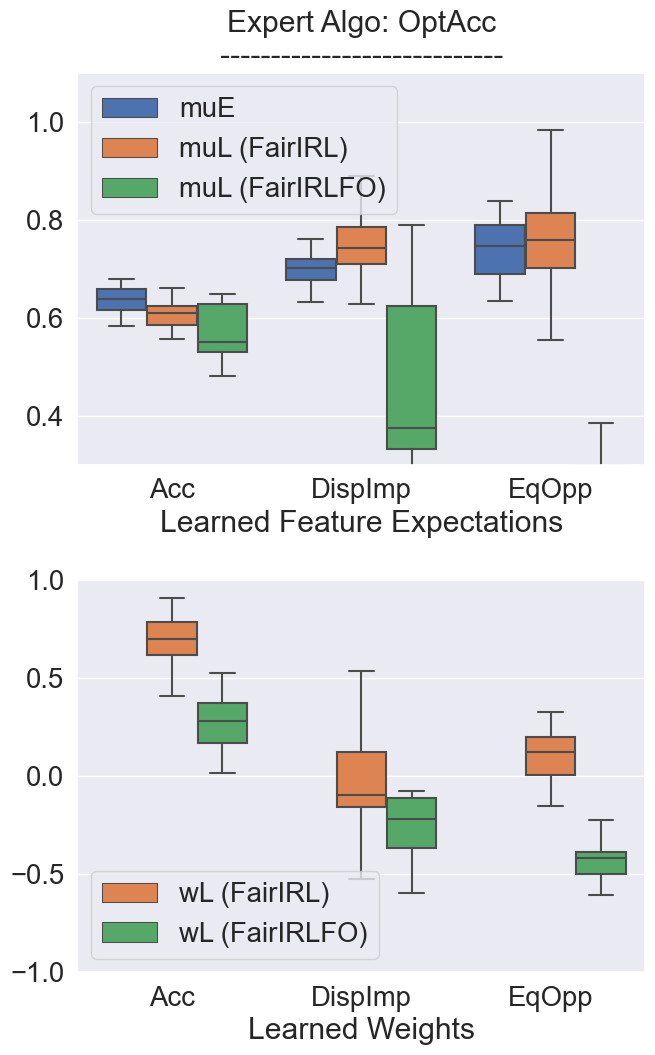

In [108]:
mu_df, w_df = compare_results(
    'OptAcc',
    dataset='COMPAS',
    mu_noise_factor=.1,
    w_noise_factor=.1,
)

DATASET: COMPAS


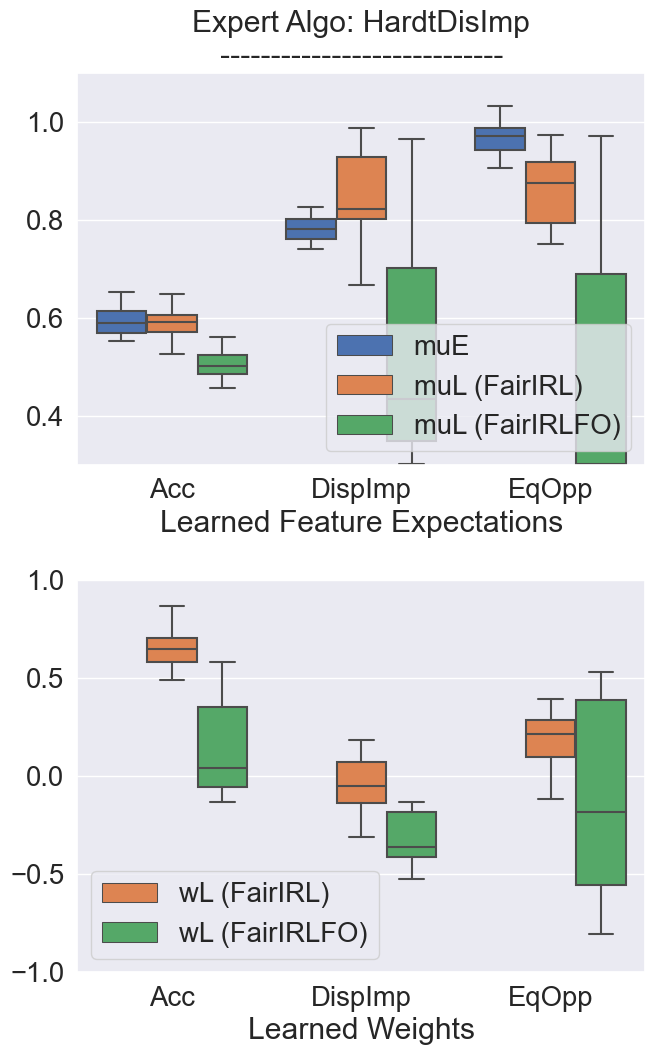

In [109]:
mu_df, w_df = compare_results('HardtDisImp', dataset='COMPAS', mu_noise_factor=.1, w_noise_factor=.1)

DATASET: COMPAS


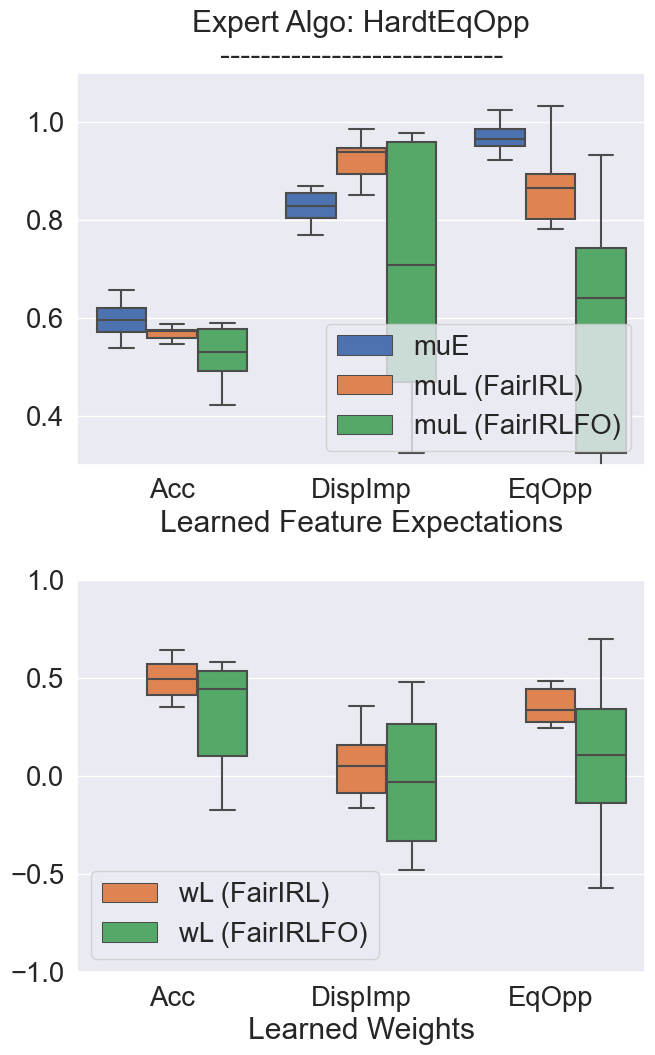

In [110]:
mu_df, w_df = compare_results('HardtEqOpp', dataset='COMPAS', mu_noise_factor=.1, w_noise_factor=.1)

# Scratch